In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly as px
import plotly.io as pio


In [ ]:
# Configure pandas to display all columns in DataFrames (avoid truncation)
pd.set_option('display.max_columns', None)

# Set plotly template to 'ggplot2' for a specific visual style
pio.templates.default = "ggplot2"

# Configure seaborn plot aesthetics:
#  - Figure size: 15 inches wide by 8 inches high
#  - Font scale: 1.2 times larger
#  - Axes face color: "#FFF9ED" (light background)
#  - Figure face color: "#FFF9ED" (consistent background)
sns.set(rc={"figure.figsize": [15, 8]}, font_scale=1.2)
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define a color palette for visualizations
palette = ["#007B7F", "#A2D5C6", "#FF6B6B", "#B392AC", "#00203F", "#FFD166"]

# Set the default color palette for seaborn plots using the defined palette
sns.set_palette(palette)

# Create a ListedColormap object from the color palette for further customization
color_map = colors.ListedColormap(palette)

In [ ]:
df = pd.read_csv("/content/Dataset Heart Disease.csv")
print(df.head())

   Unnamed: 0  age  sex  chest pain type  resting bps  cholesterol  \
0           0   40    1                2          140        289.0   
1           1   49    0                3          160        180.0   
2           2   37    1                2          130        283.0   
3           3   48    0                4          138        214.0   
4           4   54    1                3          150        195.0   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  \
0                    0            0             172                0      0.0   
1                    0            0             156                0      1.0   
2                    0            1              98                0      0.0   
3                    0            0             108                1      1.5   
4                    0            0             122                0      0.0   

   ST slope  target  
0         1       0  
1         2       1  
2         1       0  
3   

In [ ]:
print(df.shape) # no. of samples and columns

(1048, 13)


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [ ]:
df = df.drop(columns='Unnamed: 0') # dropping unnecessary column

In [ ]:
print(df.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bps              int64
cholesterol            float64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB
None


In [ ]:
#checking for missing values
print(df.isna().sum())

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [ ]:
print(df.duplicated().any()) # checking duplicate values

False


In [ ]:
print(df.describe())

               age          sex  chest pain type  resting bps  cholesterol  \
count  1048.000000  1048.000000      1048.000000  1048.000000  1048.000000   
mean     53.325382     0.734733         2.817748   132.613550   245.172710   
std       9.397822     0.441686         1.118649    17.367605    57.101359   
min      28.000000     0.000000         1.000000    92.000000    85.000000   
25%      46.000000     0.000000         2.000000   120.000000   208.000000   
50%      54.000000     1.000000         3.000000   130.000000   239.000000   
75%      60.000000     1.000000         4.000000   140.000000   275.000000   
max      77.000000     1.000000         4.000000   200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1048.000000  1048.000000     1048.000000      1048.000000   
mean              0.162214     0.606870      142.918893         0.368321   
std               0.368823     0.763313       24.427115         0.482

In [ ]:
print(df.nunique()) # calculating unique values in each column


age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64


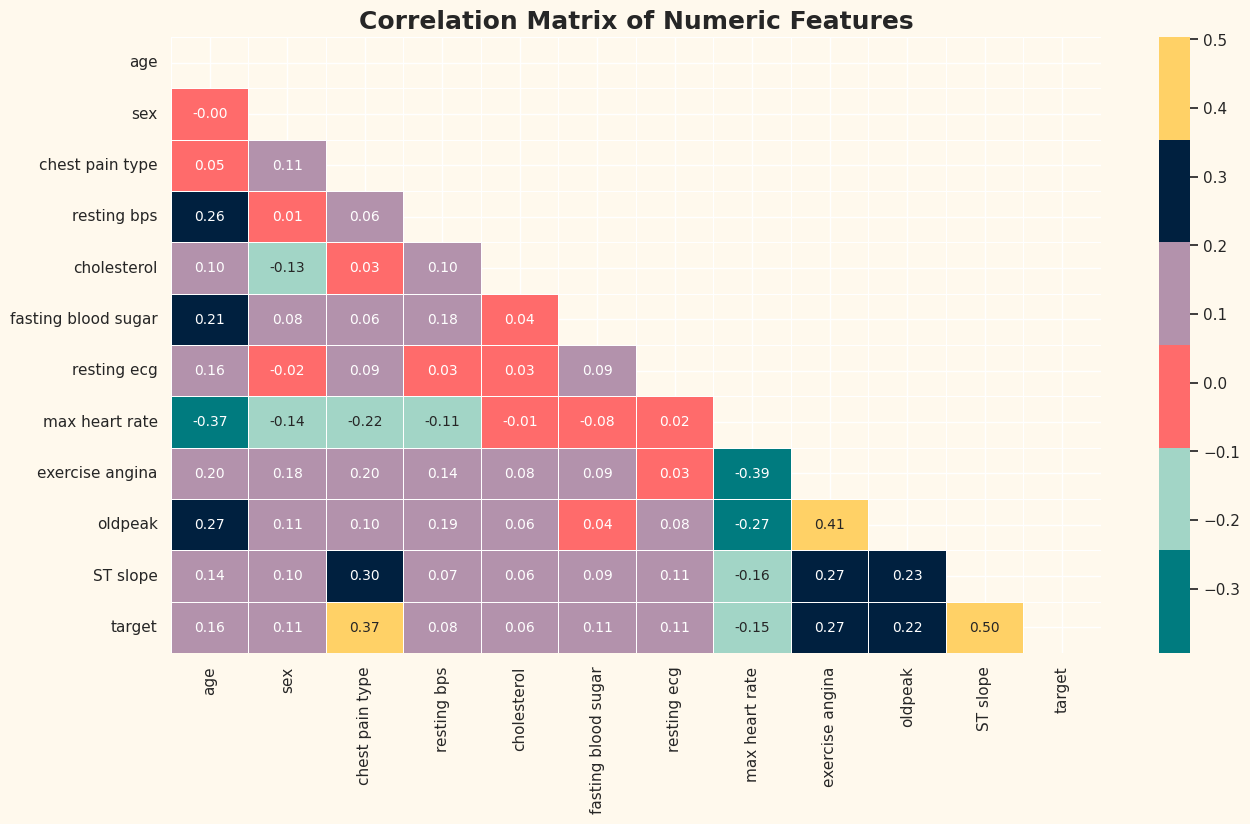

In [ ]:
# Create a correlation matrix to visualize relationships between numerical features
correlation_matrix = df.corr()

# Create a mask to hide redundant upper triangular part of the heatmap
mask = np.triu(np.ones_like(df.corr()))

# Generate a heatmap using seaborn to visualize correlations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=color_map, fmt=".2f",
            annot_kws={'size': 10}, linewidths=0.5, cbar=True)

plt.title("Correlation Matrix of Numeric Features", fontsize=18, weight="bold")

plt.show()

In [ ]:
data= df.copy()


In [ ]:
# Get a list of column names
df_cols = df.columns.tolist()

In [ ]:
# Separate features (X) from the target variable (y)
X_selected = data.drop(['target'], axis=1)
y_selected = data['target']

In [ ]:
# Use SelectKBest to select the top 10 most informative features for heart disease prediction based on f_classif scores
from sklearn.feature_selection import SelectKBest, f_classif
best_feat = SelectKBest(score_func=f_classif, k=10)

fit_best = best_feat.fit(X_selected, y_selected)

# Create DataFrames to store feature scores and names
df_scores = pd.DataFrame(fit_best.scores_)
df_columns = pd.DataFrame(X_selected.columns)

# Combine feature scores and names into a single DataFrame
features_score = pd.concat([df_columns, df_scores], axis=1)
features_score.columns = ['Feature', 'Score']

# Sort features by score in descending order
features_score.sort_values(by=['Score'], inplace=True, ascending=False)

# Apply background color gradient based on feature score using seaborn
features_score.style.background_gradient(cmap=color_map)

,Feature,Score
10,ST slope,355.244365
2,chest pain type,162.385189
8,exercise angina,82.855358
9,oldpeak,51.780394
0,age,26.790160
7,max heart rate,22.782126
1,sex,13.319282
6,resting ecg,13.079904
5,fasting blood sugar,12.090848
3,resting bps,6.393105


In [ ]:
# Perform feature selection using the selected features
fit_best = best_feat.fit_transform(X_selected, y_selected)
df_selected = df[list(best_feat.get_feature_names_out())]


In [ ]:
df_selected.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'fasting blood sugar',
       'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak',
       'ST slope'],
      dtype='object')

In [ ]:
# Separate the selected features (X) from the target variable (y) again for clarity
X = df_selected
y = df['target']


In [ ]:
# Split data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

# Import necessary model classes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split data using train_test_split, ensuring class balance with 'stratify'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

print('X Train Shape is ==> ', X_train.shape)
print('y Train Shape is ==> ', y_train.shape)

print('='*30)
print('='*30)

print('X Test Shape is ==> ', X_test.shape)
print('y Test Shape is ==> ', y_test.shape)

X Train Shape is ==>  (786, 10)
y Train Shape is ==>  (786,)
X Test Shape is ==>  (262, 10)
y Test Shape is ==>  (262,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Apply standard scaling to numerical features (assuming all features in df_selected are numerical)
scaler = StandardScaler()
pipeline_final = Pipeline(
    steps=[
        ("scaler", scaler)
    ]
)

X_train_final = pipeline_final.fit_transform(X_train)
X_test_final = pipeline_final.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# Define a function to evaluate model performance metrics (F1-score, accuracy, R-squared)
def model_performance(model_name, model, X_train_data, X_test_data, y_train_data, y_test_data):
    y_train_predicted = model.predict(X_train_data)
    y_test_predicted = model.predict(X_test_data)

    print(f"==> Model and some Details: {model_name}")
    print("**" * 30)

    f1_score_training = round(
        f1_score(y_train_data, y_train_predicted, average='weighted'), 3) * 100
    f1_score_testing = round(
        f1_score(y_test_data, y_test_predicted, average='weighted'), 3) * 100

    print(
        f"F1-score for training data using {model_name} : {f1_score_training} %")
    print(
        f"F1-score for testing data using {model_name} : {f1_score_testing} %")

    print("**" * 30)

    acc_score_training = round(accuracy_score(
        y_train_data, y_train_predicted), 3) * 100
    acc_score_testing = round(accuracy_score(
        y_test_data, y_test_predicted), 3) * 100
    print(
        f"Accuracy Score for training data using {model_name} : {acc_score_training} %")
    print(
        f"Accuracy Score for testing data using {model_name} : {acc_score_testing} %")

    print("**" * 30)

    precision_training = round(precision_score(
        y_train_data, y_train_predicted, average='weighted'), 3) * 100
    precision_testing = round(precision_score(
        y_test_data, y_test_predicted, average='weighted'), 3) * 100
    print(
        f"Precision for training data using {model_name} : {precision_training} %")
    print(
        f"Precision for testing data using {model_name} : {precision_testing} %")

    print("**" * 30)

    recall_training = round(recall_score(
        y_train_data, y_train_predicted, average='weighted'), 3) * 100
    recall_testing = round(recall_score(
        y_test_data, y_test_predicted, average='weighted'), 3) * 100
    print(f"Recall for training data using {model_name} : {recall_training} %")
    print(f"Recall for testing data using {model_name} : {recall_testing} %")

In [ ]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix


In [ ]:
def conf_matrix(model, title=""):

    y_predict = model.predict(X_test_final)

    confusionMatrix = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(9, 7))
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cbar=False)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{title}")

    plt.show()

**Logistic Regression**

In [ ]:
model_logistic = LogisticRegression(
    random_state=42, solver='lbfgs', max_iter=1000)
model_logistic.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
model_performance(
    model_name="Logistic Regression",
    model=model_logistic,
    X_train_data=X_train_final,
    X_test_data=X_test_final,
    y_train_data=y_train,
    y_test_data=y_test
)

==> Model and some Details: Logistic Regression
************************************************************
F1-score for training data using Logistic Regression : 78.10000000000001 %
F1-score for testing data using Logistic Regression : 78.60000000000001 %
************************************************************
Accuracy Score for training data using Logistic Regression : 78.10000000000001 %
Accuracy Score for testing data using Logistic Regression : 78.60000000000001 %
************************************************************
Precision for training data using Logistic Regression : 78.10000000000001 %
Precision for testing data using Logistic Regression : 78.7 %
************************************************************
Recall for training data using Logistic Regression : 78.10000000000001 %
Recall for testing data using Logistic Regression : 78.60000000000001 %


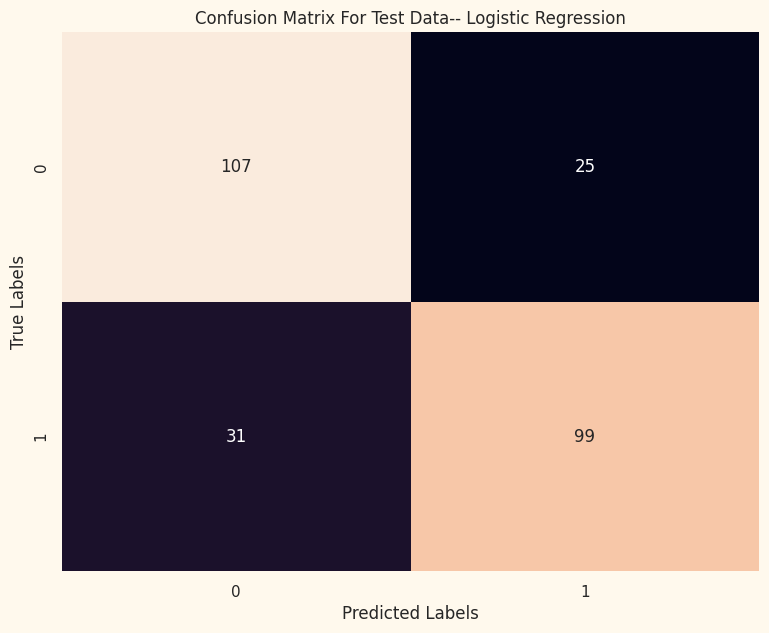

In [ ]:
conf_matrix(model=model_logistic,
            title="Confusion Matrix For Test Data-- logistic Regression".title())

**KNN**

In [ ]:
# Create a KNN classifier with specific parameters:
# - n_neighbors: The number of neighbors to consider (in this case, 5)
# - p: The power parameter for the Minkowski distance (in this case, 4, indicating the Manhattan distance)
# - n_jobs: Number of CPU cores to use for parallel processing (in this case, -1 means to use all available cores)
KNN_clf = KNeighborsClassifier(n_neighbors=5, p=4, n_jobs=-1)

# Train the KNN classifier on the training data
KNN_clf.fit(X_train_final, y_train)

KNeighborsClassifier(n_jobs=-1, p=4)

In [ ]:
model_performance(model_name="K-Nearest Neighbors Algorithm",
                  model=KNN_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: K-Nearest Neighbors Algorithm
************************************************************
F1-score for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
F1-score for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Accuracy Score for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
Accuracy Score for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Precision for training data using K-Nearest Neighbors Algorithm : 82.8 %
Precision for testing data using K-Nearest Neighbors Algorithm : 80.2 %
************************************************************
Recall for training data using K-Nearest Neighbors Algorithm : 82.69999999999999 %
Recall for testing data using K-Nearest Neighbors Algorithm : 80.2 %


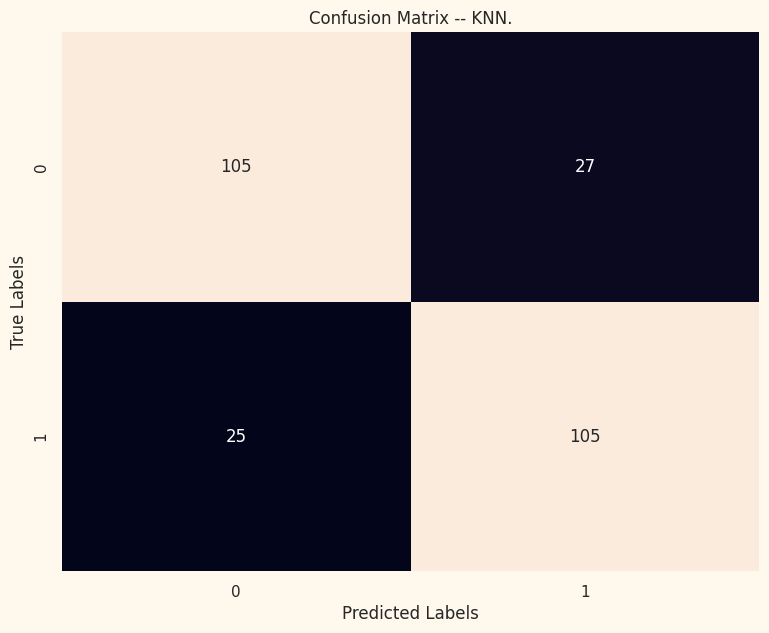

In [ ]:
conf_matrix(model=KNN_clf,
            title="Confusion Matrix -- KNN.")

**Random Forest**

In [ ]:
# Create a Random Forest classifier with specific parameters:
# - n_estimators: The number of decision trees in the forest (in this case, 200)
# - max_depth: The maximum depth of each decision tree (in this case, 12)
# - random_state: A seed value for random number generation to ensure reproducibility (in this case, 45)
RF_clf = RandomForestClassifier(
    n_estimators=200, max_depth=12, random_state=45)

# Train the Random Forest classifier on the training data
RF_clf.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=45)

In [ ]:
model_performance(model_name="Random Forest.",
                  model=RF_clf,
                  X_train_data=X_train_final,
                  X_test_data=X_test_final,
                  y_train_data=y_train,
                  y_test_data=y_test)

==> Model and some Details: Random Forest.
************************************************************
F1-score for training data using Random Forest. : 100.0 %
F1-score for testing data using Random Forest. : 80.5 %
************************************************************
Accuracy Score for training data using Random Forest. : 100.0 %
Accuracy Score for testing data using Random Forest. : 80.5 %
************************************************************
Precision for training data using Random Forest. : 100.0 %
Precision for testing data using Random Forest. : 80.60000000000001 %
************************************************************
Recall for training data using Random Forest. : 100.0 %
Recall for testing data using Random Forest. : 80.5 %


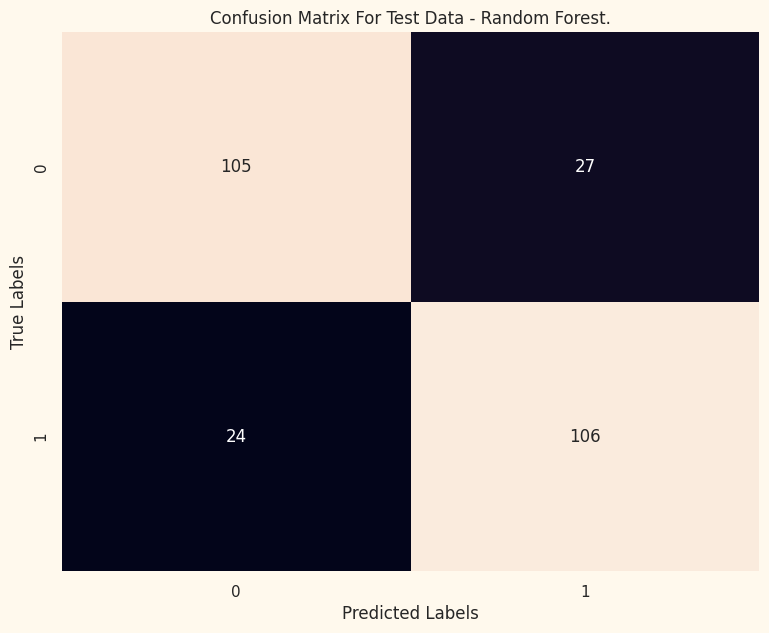

In [ ]:
conf_matrix(model=RF_clf,
            title="Confusion Matrix For Test Data - Random Forest.".title())

**We use Different algorithms like random forest, KNN and Logistic Regression on the dataset of Heart disease to find which algorithm predicts the best result so random forest gives 80.5% which is best among all these algorithms.**